In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 
from mocsy import mocsy
import gsw
import pandas as pd


In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]
tmask

<xarray.DataArray 'tmask' (deptht: 40, y: 898, x: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: deptht, y, x

In [3]:
cm_oxy = copy.copy(cm.oxy)
cm_oxy.set_bad('burlywood')

In [4]:
chem_alkalinity_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/01may21/SalishSea_1h_20210501_20210501_chem_T.nc')
chem_alkalinity_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/03may21/SalishSea_1h_20210503_20210503_chem_T.nc')
chem_alkalinity_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/06may21/SalishSea_1h_20210506_20210506_chem_T.nc')
chem_alkalinity_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/16may21/SalishSea_1h_20210516_20210516_chem_T.nc')
chem_alkalinity_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1h_20210531_20210531_chem_T.nc')
chem_alkalinity_run_may_01

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2021-05-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210531_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:11:48 GMT
    uuid:         73af0f2a-dbdf-4d83-9a75-ba23e1d34336

In [5]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

chem_alkalinity_run_may_01 = chem_alkalinity_run_may_01.isel(y = y_slice, x = x_slice)
chem_alkalinity_run_may_03 = chem_alkalinity_run_may_03.isel(y = y_slice, x = x_slice)
chem_alkalinity_run_may_06 = chem_alkalinity_run_may_06.isel(y = y_slice, x = x_slice)
chem_alkalinity_run_may_16 = chem_alkalinity_run_may_16.isel(y = y_slice, x = x_slice)
chem_alkalinity_run_may_31 = chem_alkalinity_run_may_31.isel(y = y_slice, x = x_slice)




In [6]:
phy_alkalinity_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/01may21/SalishSea_1h_20210501_20210501_grid_T.nc')
phy_alkalinity_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/03may21/SalishSea_1h_20210503_20210503_grid_T.nc')
phy_alkalinity_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/06may21/SalishSea_1h_20210506_20210506_grid_T.nc')
phy_alkalinity_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/16may21/SalishSea_1h_20210516_20210516_grid_T.nc')
phy_alkalinity_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1h_20210531_20210531_grid_T.nc')
phy_alkalinity_run_may_01

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2021-05-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210531_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 21:11:32 GMT
    uuid:         12da798f-cc84-4e7c-bb9c-ce8cf7d1bd89

In [7]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

phy_alkalinity_run_may_01 = phy_alkalinity_run_may_01.isel(y = y_slice, x = x_slice)
phy_alkalinity_run_may_03 = phy_alkalinity_run_may_03.isel(y = y_slice, x = x_slice)
phy_alkalinity_run_may_06 = phy_alkalinity_run_may_06.isel(y = y_slice, x = x_slice)
phy_alkalinity_run_may_16 = phy_alkalinity_run_may_16.isel(y = y_slice, x = x_slice)
phy_alkalinity_run_may_31 = phy_alkalinity_run_may_31.isel(y = y_slice, x = x_slice)

In [8]:
chem_long_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/01may21/SalishSea_1h_20210501_20210501_chem_T.nc')
chem_long_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/03may21/SalishSea_1h_20210503_20210503_chem_T.nc')
chem_long_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/06may21/SalishSea_1h_20210506_20210506_chem_T.nc')
chem_long_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/16may21/SalishSea_1h_20210516_20210516_chem_T.nc')
chem_long_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31may21/SalishSea_1h_20210531_20210531_chem_T.nc')
chem_long_run_may_01

<xarray.Dataset>
Dimensions:                     (y: 898, x: 398, nvertex: 4, deptht: 40,
                                 axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat                     (y, x) float32 ...
    nav_lon                     (y, x) float32 ...
  * deptht                      (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered               (time_counter) datetime64[ns] ...
  * time_counter                (time_counter) datetime64[ns] 2021-05-01T00:3...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon              (y, x, nvertex) float32 ...
    bounds_nav_lat              (y, x, nvertex) float32 ...
    area                        (y, x) float32 ...
    deptht_bounds               (deptht, axis_nbounds) float32 ...
    time_centered_bounds        (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds         (time_counter, axis_nbounds) datetime64[ns] ...
    PAR                         (time_counter, deptht, y, x) float32 ...
    turbidity                   (time_counter, deptht, y, x) float32 ...
    dissolved_inorganic_carbon  (time_counter, deptht, y, x) float32 ...
    total_alkalinity            (time_counter, deptht, y, x) float32 ...
    dissolved_oxygen            (time_counter, deptht, y, x) float32 ...
    CO2_flux                    (time_counter, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210525_chem_T
    description:  chemistry and light
    title:        chemistry and light
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 06:57:06 GMT
    uuid:         9761b240-f98e-4158-8910-042b73a9982b

In [9]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

chem_long_run_may_01 = chem_long_run_may_01.isel(y = y_slice, x = x_slice)
chem_long_run_may_03 = chem_long_run_may_03.isel(y = y_slice, x = x_slice)
chem_long_run_may_06 = chem_long_run_may_06.isel(y = y_slice, x = x_slice)
chem_long_run_may_16 = chem_long_run_may_16.isel(y = y_slice, x = x_slice)
chem_long_run_may_31 = chem_long_run_may_31.isel(y = y_slice, x = x_slice)

In [10]:
phy_long_run_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/01may21/SalishSea_1h_20210501_20210501_grid_T.nc')
phy_long_run_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/03may21/SalishSea_1h_20210503_20210503_grid_T.nc')
phy_long_run_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/06may21/SalishSea_1h_20210506_20210506_grid_T.nc')
phy_long_run_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/16may21/SalishSea_1h_20210516_20210516_grid_T.nc')
phy_long_run_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/long_run/31may21/SalishSea_1h_20210531_20210531_grid_T.nc')
phy_long_run_may_01


<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2021-05-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210525_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-03 06:56:51 GMT
    uuid:         3a17c819-d209-44d6-a85b-499f260b1084

In [11]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

phy_long_run_may_01 = phy_long_run_may_01.isel(y = y_slice, x = x_slice)
phy_long_run_may_03 = phy_long_run_may_03.isel(y = y_slice, x = x_slice)
phy_long_run_may_06 = phy_long_run_may_06.isel(y = y_slice, x = x_slice)
phy_long_run_may_16 = phy_long_run_may_16.isel(y = y_slice, x = x_slice)
phy_long_run_may_31 = phy_long_run_may_31.isel(y = y_slice, x = x_slice)

In [12]:
ii, ij = 250, 350
ji, jj = 150, 300


In [13]:
def getPH (sali, temp, ta, dic):
    Tinsitu = gsw.t_from_CT(np.array(sali.vosaline).flatten(), np.array(temp.votemper).flatten(), 0)
    Spsu = 35/35.16504 * np.array(sali.vosaline).flatten()
    TA = np.array(ta.total_alkalinity).flatten()/1000.
    DIC = np.array(dic.dissolved_inorganic_carbon).flatten()/1000.
    ones = np.ones_like(Spsu.flatten())
    response_tup = mocsy.mvars(temp=Tinsitu.flatten(), sal=Spsu.flatten(), alk=TA.flatten(), 
                               dic=DIC.flatten(), sil=0.*ones, phos=0.*ones, patm=0.*ones, 
                               depth=0.*ones, lat=0.*ones, optcon='mol/m3', optt='Tinsitu', optp='m',
                               optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    return response_tup

In [14]:
pH_may_01,pco2_may_01,fco2_may_01,co2_may_01,hco3_may_01,co3_may_01,OmegaA_may_01,OmegaC_may_01,BetaD_may_01,DENis_may_01,p_may_01,Tis_may_01 = getPH(phy_long_run_may_01, phy_long_run_may_01, chem_long_run_may_01, chem_long_run_may_01)

In [15]:
pH_may_01 = pH_may_01.reshape([24, 40, 40, 40])

In [16]:
pH_may_03,pco2_may_03,fco2_may_03,co2_may_03,hco3_may_03,co3_may_03,OmegaA_may_03,OmegaC_may_03,BetaD_may_03,DENis_may_03,p_may_03,Tis_may_03 = getPH(phy_long_run_may_03, phy_long_run_may_03, chem_long_run_may_03, chem_long_run_may_03)

In [17]:
pH_may_03 = pH_may_03.reshape([24, 40, 40, 40])


In [18]:
pH_may_06,pco2_may_06,fco2_may_06,co2_may_06,hco3_may_06,co3_may_06,OmegaA_may_06,OmegaC_may_06,BetaD_may_06,DENis_may_06,p_may_06,Tis_may_06 = getPH(phy_long_run_may_06, phy_long_run_may_06, chem_long_run_may_06, chem_long_run_may_06)

In [19]:
pH_may_06 = pH_may_06.reshape([24, 40, 40, 40])

In [20]:
pH_may_16,pco2_may_16,fco2_may_16,co2_may_16,hco3_may_16,co3_may_16,OmegaA_may_16,OmegaC_may_16,BetaD_may_16,DENis_may_16,p_may_16,Tis_may_16 = getPH(phy_long_run_may_16, phy_long_run_may_16, chem_long_run_may_16, chem_long_run_may_16)

In [21]:
pH_may_16 = pH_may_16.reshape([24, 40, 40, 40])

In [22]:
pH_may_31,pco2_may_31,fco2_may_31,co2_may_31,hco3_may_31,co3_may_31,OmegaA_may_31,OmegaC_may_31,BetaD_may_31,DENis_may_31,p_may_31,Tis_may_31 = getPH(phy_long_run_may_31, phy_long_run_may_31, chem_long_run_may_31, chem_long_run_may_31)

In [23]:
pH_may_31 = pH_may_31.reshape([24, 40, 40, 40])

In [24]:
pH_may_01_al,pco2_may_01_al,fco2_may_01_al,co2_may_01_al,hco3_may_01_al,co3_may_01_al,OmegaA_may_01_al,OmegaC_may_01_al,BetaD_may_01_al,DENis_may_01_al,p_may_01_al,Tis_may_01_al = getPH(phy_alkalinity_run_may_01, phy_alkalinity_run_may_01, chem_alkalinity_run_may_01, chem_alkalinity_run_may_01)

In [25]:
pH_may_01_al = pH_may_01_al.reshape([24, 40, 40, 40])

In [26]:
pH_may_03_al,pco2_may_03_al,fco2_may_03_al,co2_may_03_al,hco3_may_03_al,co3_may_03_al,OmegaA_may_03_al,OmegaC_may_03_al,BetaD_may_03_al,DENis_may_03_al,p_may_03_al,Tis_may_03_al = getPH(phy_alkalinity_run_may_03, phy_alkalinity_run_may_03, chem_alkalinity_run_may_03, chem_alkalinity_run_may_03)

In [27]:
pH_may_03_al = pH_may_03_al.reshape([24, 40, 40, 40])

In [28]:
pH_may_06_al,pco2_may_06_al,fco2_may_06_al,co2_may_06_al,hco3_may_06_al,co3_may_06_al,OmegaA_may_06_al,OmegaC_may_06_al,BetaD_may_06_al,DENis_may_06_al,p_may_06_al,Tis_may_06_al = getPH(phy_alkalinity_run_may_06, phy_alkalinity_run_may_06, chem_alkalinity_run_may_06, chem_alkalinity_run_may_06)

In [29]:
pH_may_06_al = pH_may_06_al.reshape([24, 40, 40, 40])

In [30]:
pH_may_16_al,pco2_may_16_al,fco2_may_16_al,co2_may_16_al,hco3_may_16_al,co3_may_16_al,OmegaA_may_16_al,OmegaC_may_16_al,BetaD_may_16_al,DENis_may_16_al,p_may_16_al,Tis_may_16_al = getPH(phy_alkalinity_run_may_16, phy_alkalinity_run_may_16, chem_alkalinity_run_may_16, chem_alkalinity_run_may_16)

In [31]:
pH_may_16_al = pH_may_16_al.reshape([24, 40, 40, 40])

In [32]:
pH_may_31_al,pco2_may_31_al,fco2_may_31_al,co2_may_31_al,hco3_may_31_al,co3_may_31_al,OmegaA_may_31_al,OmegaC_may_31_al,BetaD_may_31_al,DENis_may_31_al,p_may_31_al,Tis_may_31_al = getPH(phy_alkalinity_run_may_31, phy_alkalinity_run_may_31, chem_alkalinity_run_may_31, chem_alkalinity_run_may_31)

In [33]:
pH_may_31_al = pH_may_31_al.reshape([24, 40, 40, 40])

In [34]:
diff_may_01 = pH_may_01_al - pH_may_01
diff_may_03 = pH_may_03_al - pH_may_03
diff_may_06 = pH_may_06_al - pH_may_06
diff_may_16 = pH_may_16_al - pH_may_16
diff_may_31 = pH_may_31_al - pH_may_31
diff_may_01

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [35]:
diff_may_03.max()

0.004268939388080817

In [36]:
tmask_plan = tmask.isel(deptht = 0, y = y_slice, x = x_slice)

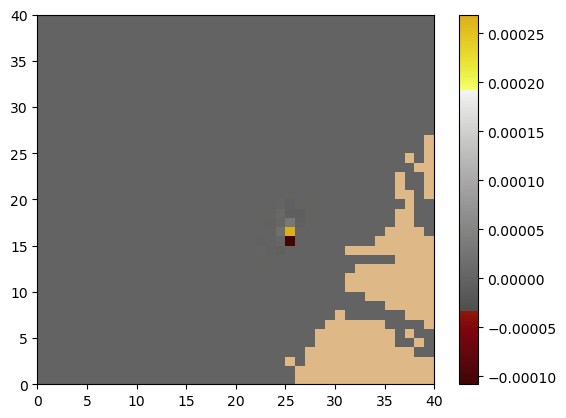

In [37]:
plt.pcolormesh(np.ma.array((diff_may_01[2, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

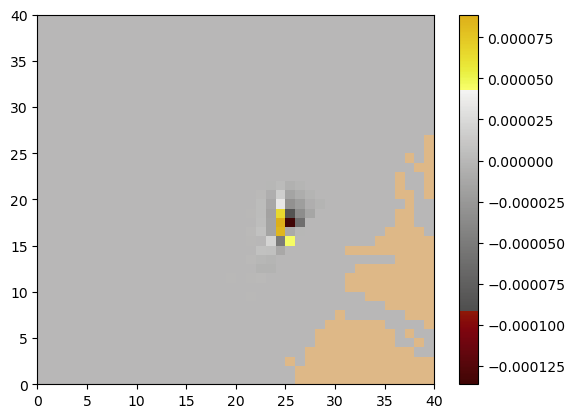

In [38]:
plt.pcolormesh(np.ma.array((diff_may_01[5, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

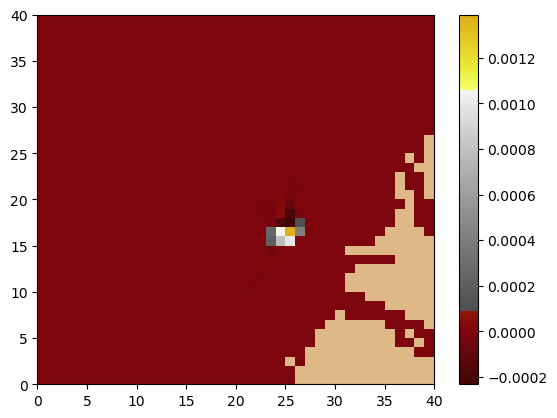

In [39]:
plt.pcolormesh(np.ma.array((diff_may_01[11, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

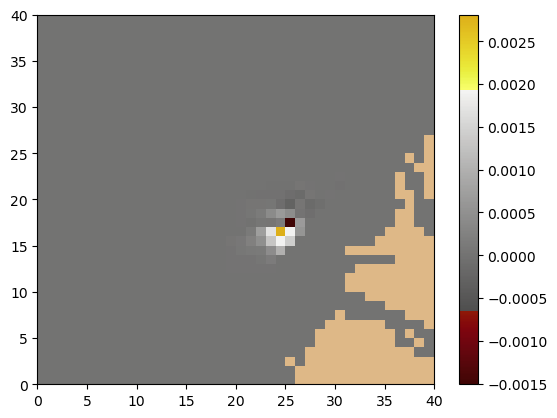

In [40]:
plt.pcolormesh(np.ma.array((diff_may_01[23, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

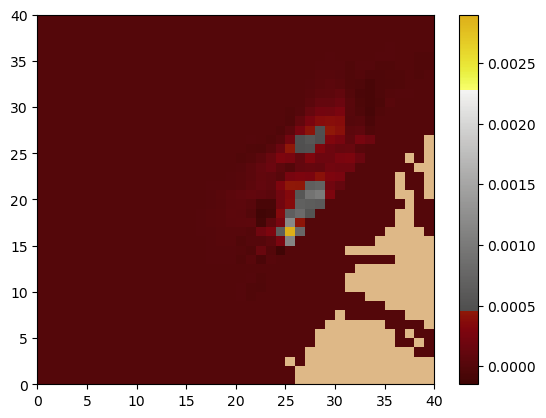

In [41]:
plt.pcolormesh(np.ma.array((diff_may_03[23, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

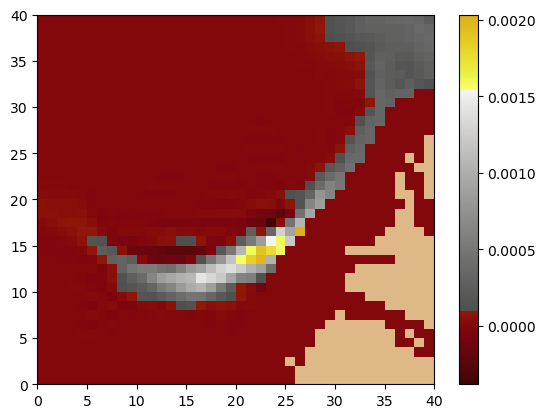

In [42]:
plt.pcolormesh(np.ma.array((diff_may_06[23, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

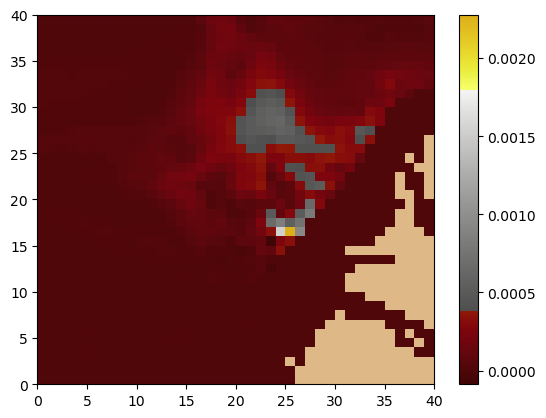

In [43]:
plt.pcolormesh(np.ma.array((diff_may_16[23, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

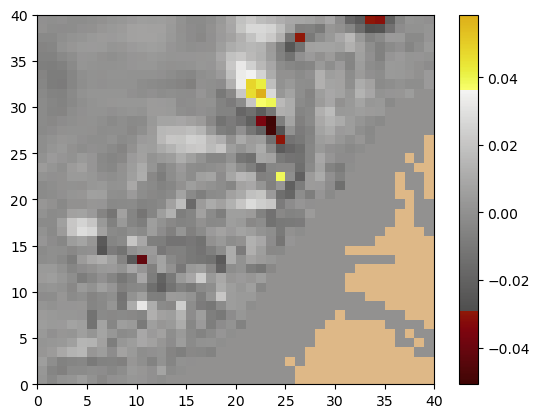

In [44]:
plt.pcolormesh(np.ma.array((diff_may_31[23, 23]), mask = 1- tmask_plan), cmap = cm_oxy)
plt.colorbar() 
plt.show()

In [45]:
tmask_vy = tmask.isel(y = 446, x= x_slice)

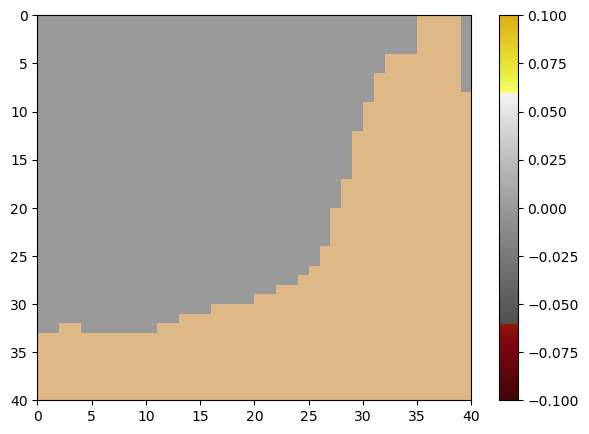

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[2,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

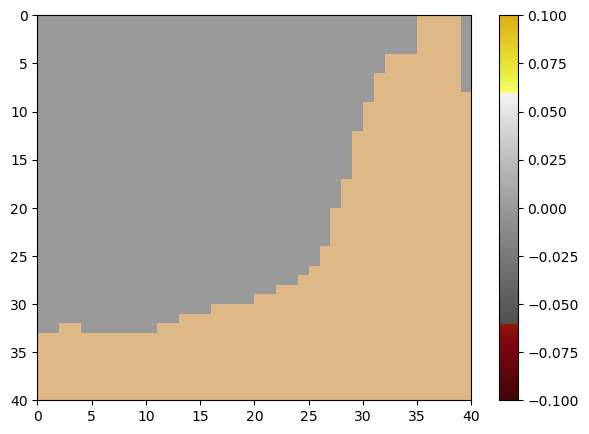

In [47]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[5,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

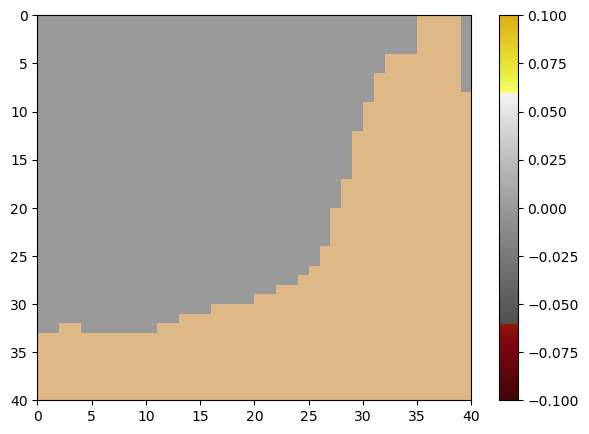

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[11,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

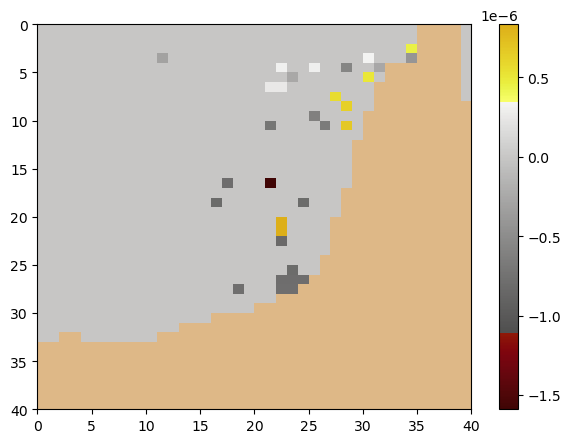

In [49]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[23,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

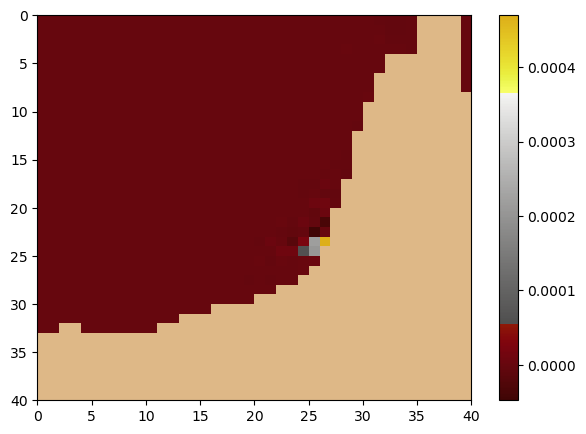

In [50]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_03[23,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

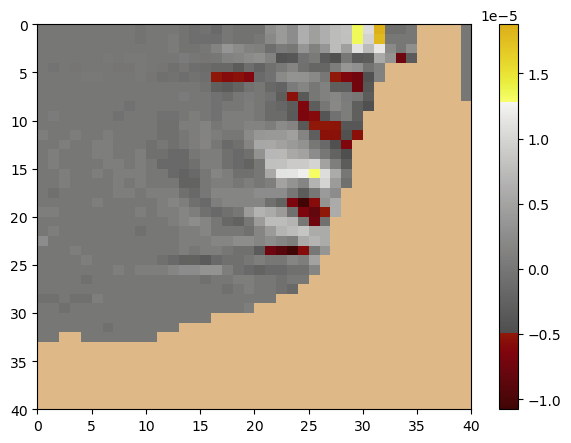

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_06[23,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

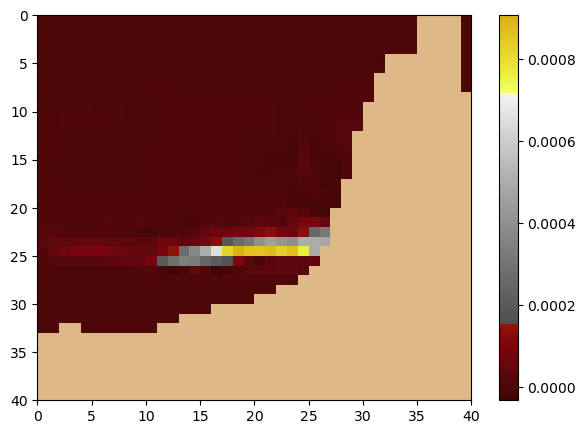

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_16[23,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

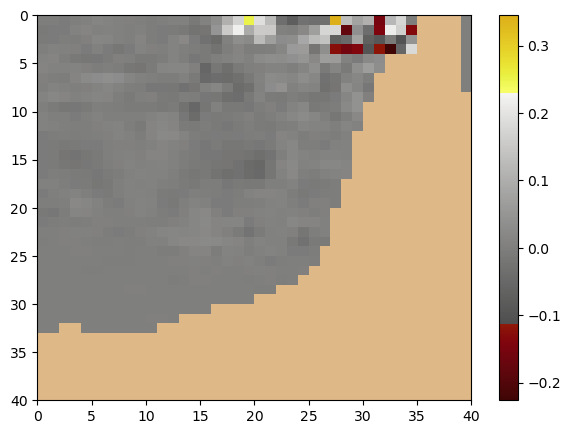

In [53]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_31[23,:, 26,:], mask = 1- tmask_vy), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

In [54]:
tmask_vx = tmask.isel(y = y_slice, x = 304)

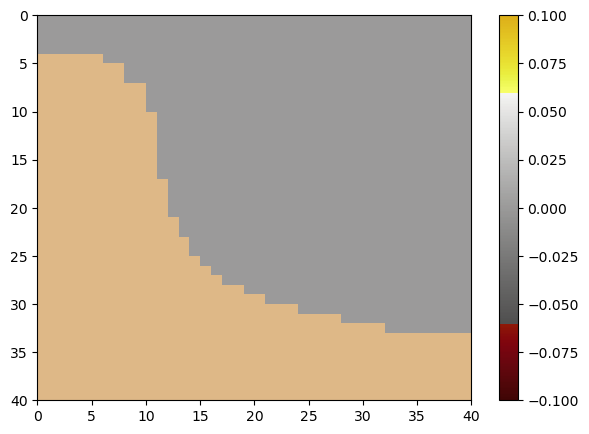

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[2,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

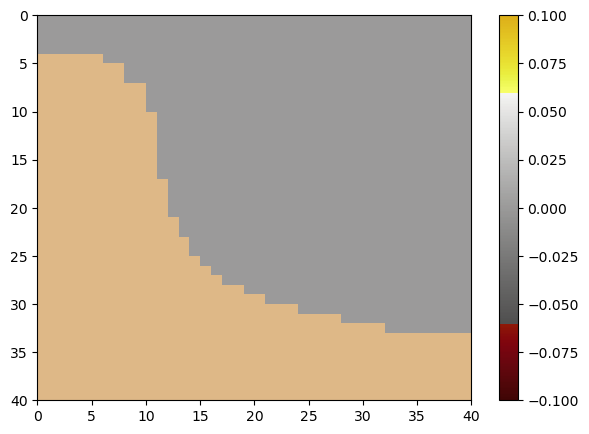

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[5,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

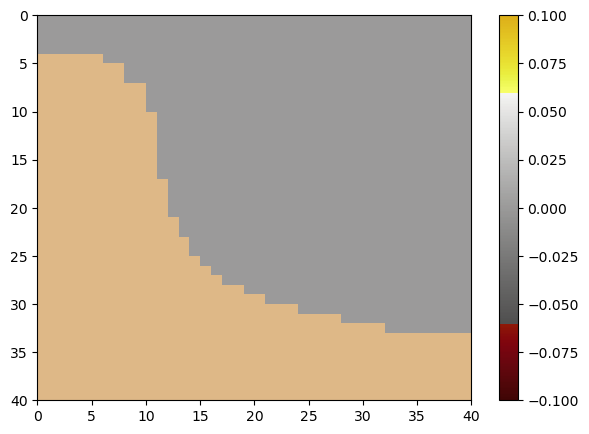

In [57]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[11,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

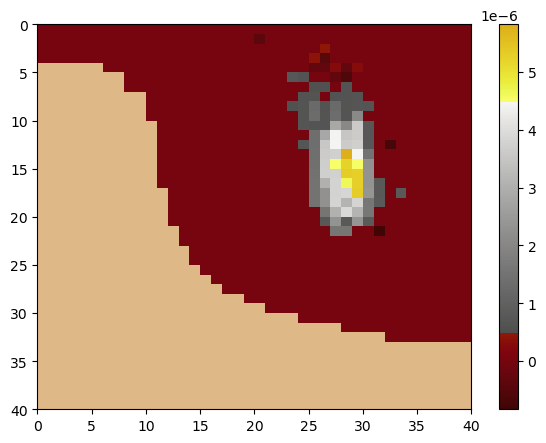

In [58]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_01[23,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

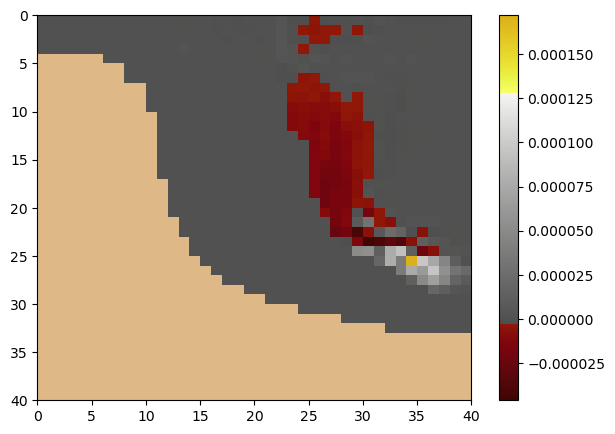

In [59]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_03[23,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

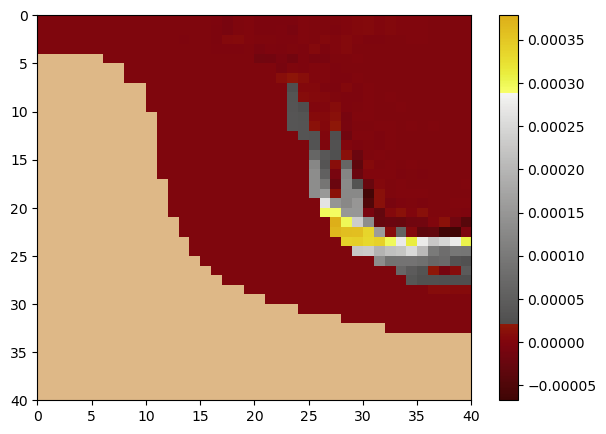

In [60]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_06[23,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

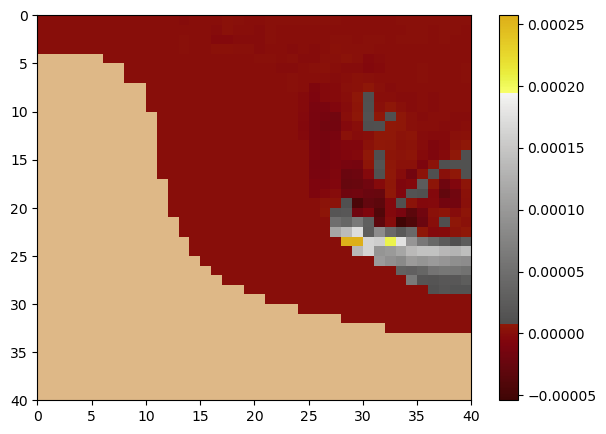

In [61]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_16[23,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()

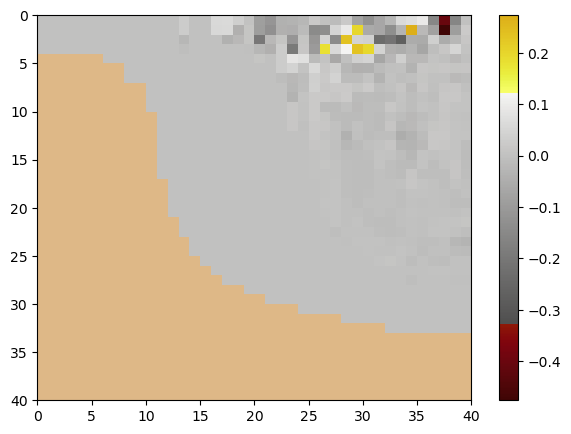

In [62]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
pc = axs.pcolormesh(np.ma.array(diff_may_31[23,:, :,34], mask = 1- tmask_vx), cmap = cm_oxy)
axs.invert_yaxis()
fig.colorbar(pc, ax=axs)
plt.show()